In [0]:
import pandas as pd
df = pd.read_csv("employee_data.csv",sep="\t")

In [7]:
print(df.columns)
print(df.shape)

Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')
(978, 8)


In [83]:
df.head()

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40


**Problem #1**
*Identify Categorical variables & Continuous Variables*

In [84]:
#continuous Data
df[df._get_numeric_data().columns].head()

,age,salary,hours_per_week
0,39,77516,40
1,50,83311,13
2,38,215646,40
3,53,234721,40
4,28,338409,40


**"Observation"**
It is almost impossible to generalise a line of code or a logic to find out the categorial or continuous data. 

***1)*** Suppose we generalise numeric data as continuous but in the dataframe it is just 1 or 0 then it can not be considered as continuous but categorical.

***2)*** Suppose the data in a column is ranging from 0 to 1000 with any value between this range then it should be assumed as continuous data but what if 1 is written as "1" in dataframe then that makes it string dtype so the logic set is to find the dtype and if it is integer only then it is considered to be continuous which will implicitly fail hereby.

***3)*** What if the data in a column is either 1 or 100 that makes the range vast and if the logic if for range then it will return as continuous data which is not the case here as there are only two integers that is 1 or 100 and nothing else which should be categorical.

***4)*** So to find out the data is categorical or continuous, one needs to imply every condition as in preset dtype, try/except dtype conversion, range of data, frequency of data and others as one can think of according to the requirement


In [85]:
#Categorical Data
for i in df:
  if(df[i].dtype==object): #(o) dtype in pandas equals string in python or string_ in numpy
     print(df[i].name,df[df[i].name].unique(),'\n')

employment_type [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc'] 

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Gender [' Male' ' Female'] 



***Problem #2***

Carry on a Univariate analysis on all the Variables/Fields. User bar plots for Categorical Variables & histogram or line plot for Continuous ones. Label the plot and axis clearly for intuitive understanding. Mention observations drawn from each Univariate plot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58b5e77748>,
      dtype=object)

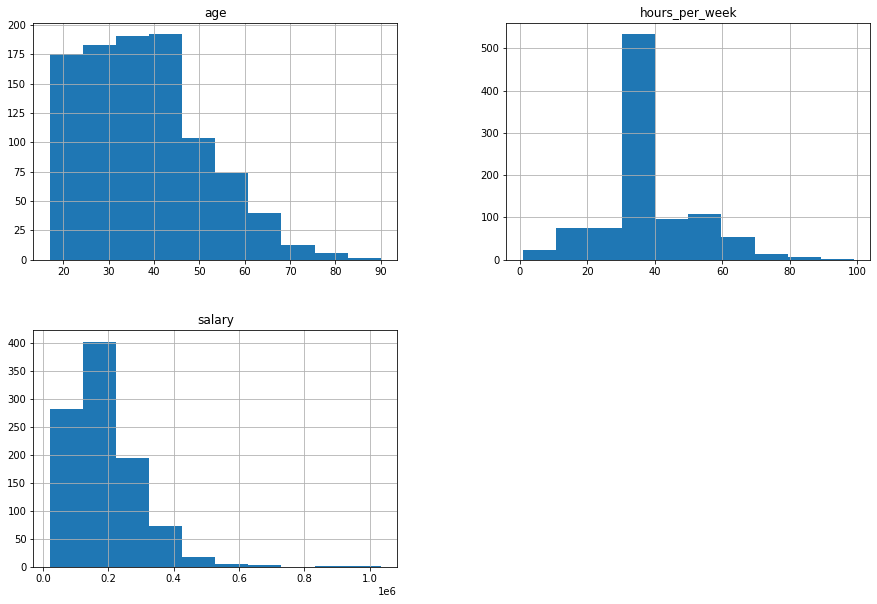

In [43]:
#Continuous Univariate Analysis
df.hist(figsize=[15,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58b5b81390>,
      dtype=object)

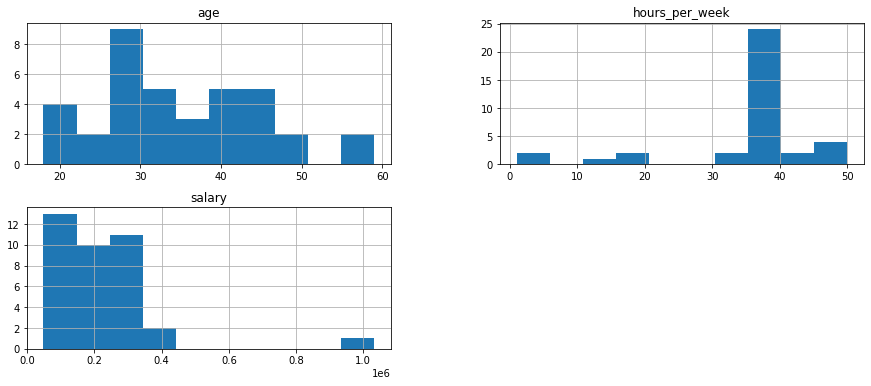

In [86]:
df[(df['employment_type'].str.strip()=="State-gov")].hist(figsize=[15,6])

**Observation** 

Graph 1,2,3

*   Highest People are from the age group 39,46 (approx)
*   A significant proportion of people are working between 30 to 40 hours per week
*   The age graph also depicts that there is not a large gap between people working in the age gap of 20 to 45
*   There a small number of people who are working in their age of 83+
*   There is a drastic decrease in number of people working after age of 45 as it seems they are settling at a earlier age now
*   There are few people who are working more than 80-100 hours per week which can cause health problems as their age is right now depicted but could be a concerning issue
*   There is a large number of people working on a small pay scale which depicts that there is a need for standard pay scale
*   Only 1% of total are getting a good salary



Graph 4,5,6
#Filtered graph for government employess


*   Employees are ranging higher between age 28 to 30 which is good as the youth should be given a chance to work and understand the system
*   Between age gap of 30 and 48 the graph follows a constant pattern with not much variance except a downfall once in between
*   Another observation is that even after the retirement age is 60 but none employee reached 60.
*   80% of employess of this company are working on a lower payscale and for 40 hours of work every week irrespective of age which is an oppressing issue









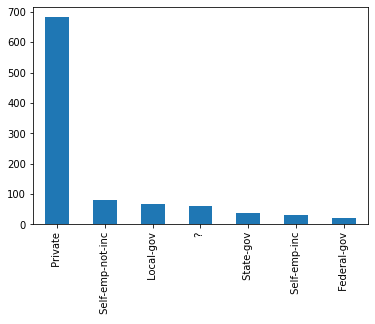

In [87]:
#Private sector is yielding more jobs than all other combined
#It also depicts that people are more trusting and attracted towards private jobs
#Which can also result an observation that government should support private sector more
#as it is irradicating a lot of unemployment
#Also self employment is rising in the graph which implies jobs such as 
#digital marketing,affilates,freelancing is also being adapted by people
df['employment_type'].value_counts().plot.bar()

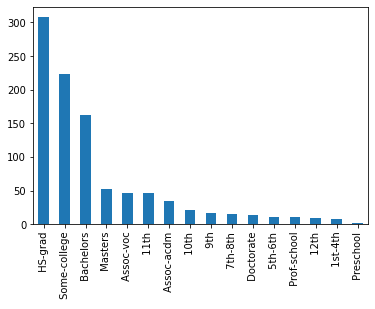

In [64]:
#65% of employess are placed just after their HS-graduation
#which implies that the skillset of the employess if not as it should be for market and they neither have much education  
df['education'].value_counts().plot.bar()

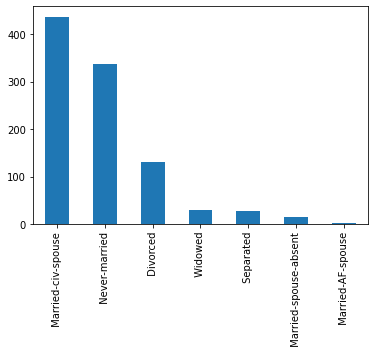

In [65]:
#Widows and separated people are less in graph which is not good but an opportunity for a company seeking some good PR
#as single mothers or widows or divorced are not looked upon in respectful way in indian society and for them making a living is a tedious task
#so some company can provide them employment and look upon a good PR in market

#Never married(bachelors) are also having a good ratio in jobs which is good as they are still on the verge of starting their settled life
df['marital-status'].value_counts().plot.bar()

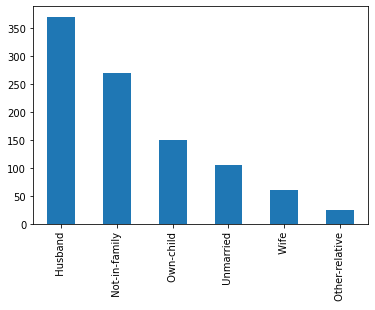

In [66]:
df['relationship'].value_counts().plot.bar()

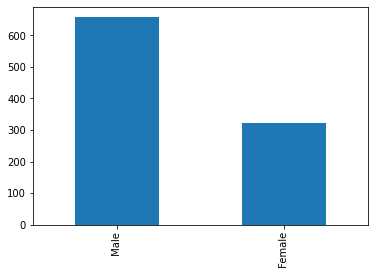

In [88]:
#Females are also being given a good opportunity in jobs in this company which is a good PR
df['Gender'].value_counts().plot.bar()

***Problem #3***

Show a bivariate analysis between Salary and hour_per_week.Choose a plot of your choice. Mention the inferences drawn

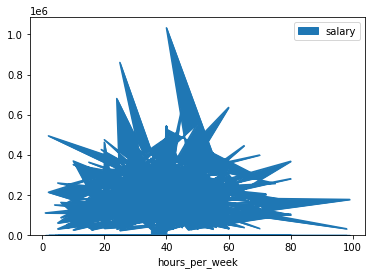

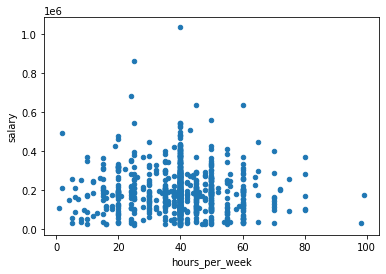

In [104]:
import seaborn as sns
from matplotlib import pyplot as plt
df.plot.area(y='salary', x='hours_per_week')
df.plot.scatter(y='salary', x='hours_per_week')
#The trend follows larger points between 30-50 hours per week
#The payscale is minimal across 1-20 hours per week which is agreeable as they work less however
#the payscale is less around 80-100 hours per week which is labour exploitation as they are working considerably more and still getting lesser amount
#The highest payscale is for people working around 40 hours per week.

***Problem #4***

For each Education type , showcase the distribution of Salary .Use Seaborn Facetgrid & Line plot.Identify the key observations and mention them

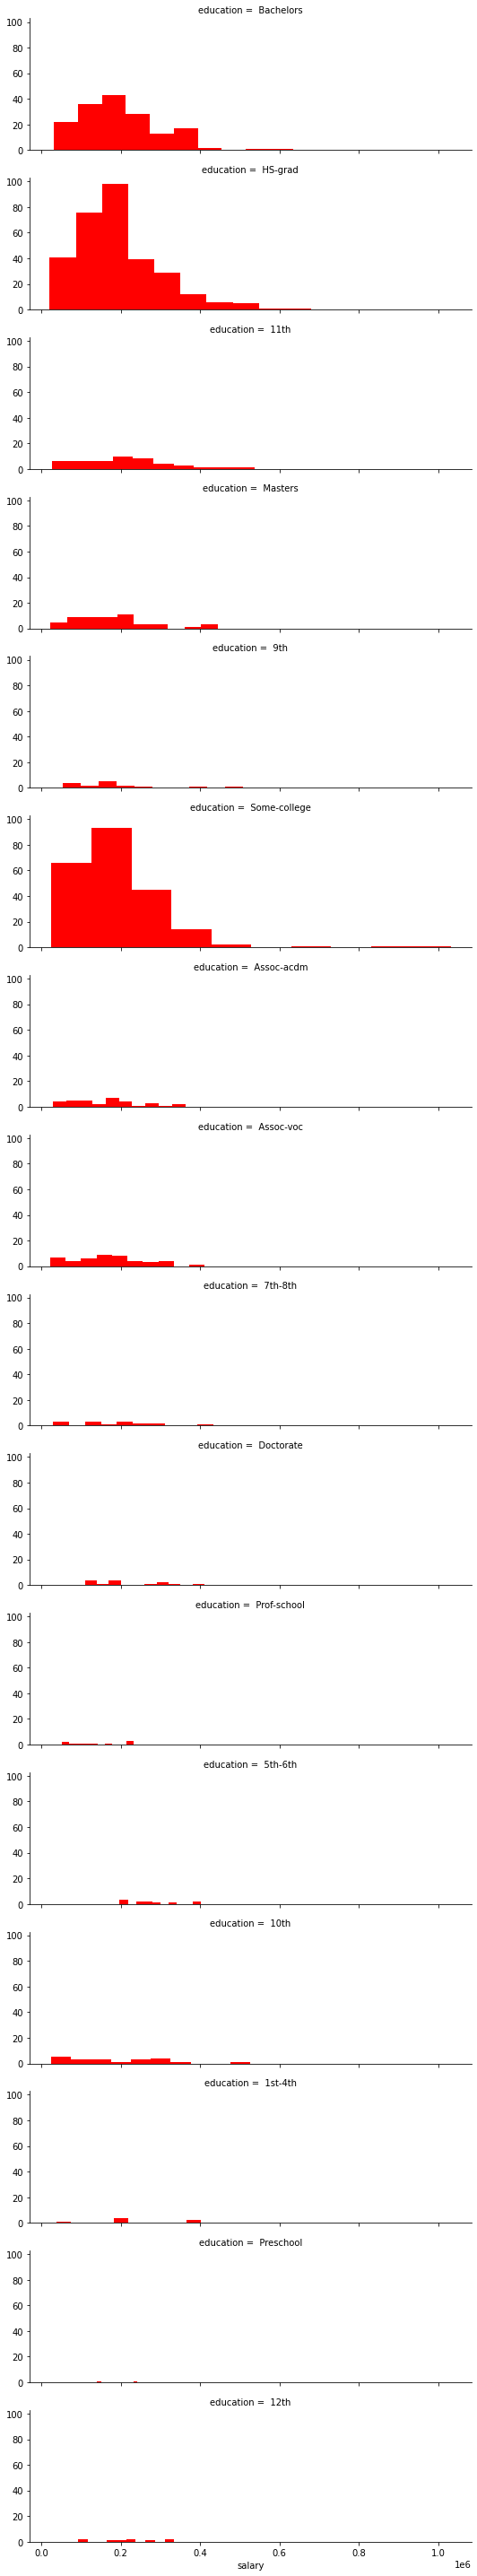

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fn =sns.FacetGrid(df,row="education", height=2.5,aspect=3)
fn = fn.map(plt.hist,"salary",color="r")
#HS-grad students are getting more number of employment with less number of pay scale
#students with preschhol education are with least number of jobs which is appropriate 
#people with masters degree are having lesser job pattern whereas they should be getting the maximum jobs
#with respect to the qualification level

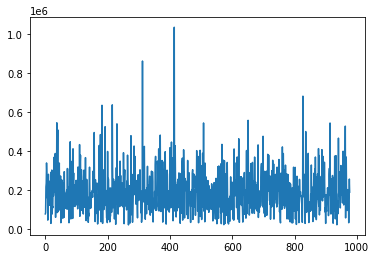

In [36]:
df['salary'].plot.line()

***Problem #5***

Categorizing each Gender & Relationship status (combination of all values) , plot the hours_per_week worked.Choose appropriate plots.Mention the inferences drawn

Gender   relationship   
 Female   Not-in-family      4638
          Other-relative      220
          Own-child          1656
          Unmarried          2784
          Wife               2334
 Male     Husband           16118
          Not-in-family      6356
          Other-relative      688
          Own-child          3077
          Unmarried          1051
          Wife                 40
Name: hours_per_week, dtype: int64


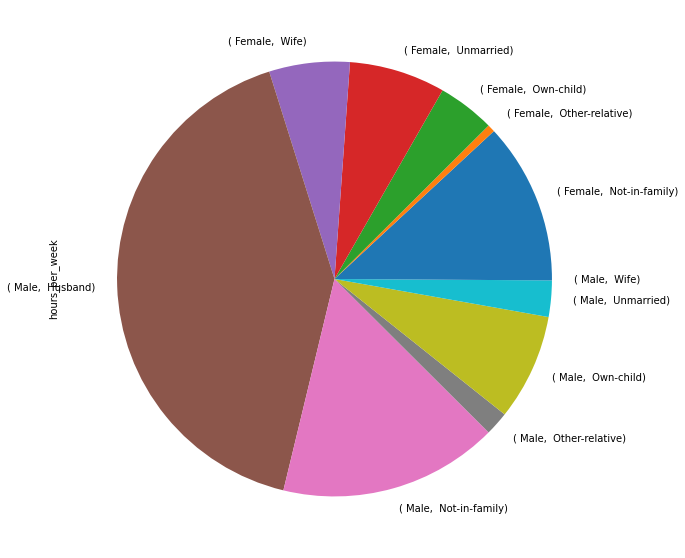

In [148]:
#Male-Husbands are working for larger number of hours per week,
#females are considerably given less chance of work

print(df.groupby(['Gender','relationship'])['hours_per_week'].sum())
df.groupby(['Gender','relationship'])['hours_per_week'].sum().plot.pie(y='hours_per_week',figsize=[10,10])

***Problem 6***

How many Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000 ?

In [187]:
print(df[( df['Gender'].str.strip() == 'Male') & (df['marital-status'].str.strip() ==\
                                                  'Married-civ-spouse') & (df['salary'] > 150000) ].head())
print("Total Married CIV Spouse Males with salary above 1,50,000 are - {}".\
      format(df[( df['Gender'].str.strip() == 'Male')\
 & (df['marital-status'].str.strip() == 'Married-civ-spouse') & (df['salary'] > 150000) ].shape[0]))

    age    employment_type  salary  ... relationship Gender hours_per_week
3    53            Private  234721  ...      Husband   Male             40
7    52   Self-emp-not-inc  209642  ...      Husband   Male             45
9    42            Private  159449  ...      Husband   Male             40
10   37            Private  280464  ...      Husband   Male             80
15   34            Private  245487  ...      Husband   Male             45

[5 rows x 8 columns]
Total Married CIV Spouse Males with salary above 1,50,000 are - 226


***Problem 7***

Are Divorced Individuals of higher age compared to Individuals that are Not-in-family ? Using mean as a measure , answer the above question & mention the respective age of the two groups

In [213]:
df1 = df[(df['relationship'].str.strip()== "Not-in-family") & \
         (df['marital-status'].isin([' Never-married',' Separated',]))]
df2 = df[(df['marital-status'].str.strip()=="Divorced") & \
         (df['relationship'].str.strip().isin(['Unmarried','Own-child','Other-relative']))]
indDiv = df1[['age']].mean()
intNif = df2[['age']].mean()
print("Mean of age of Divorced Individuals is - {}\nMean of age of Not-In-Family Individuals is - {}".format\
      (indDiv,intNif))
##Age of Divorced Individuals is less in comparision to age of Not-In-Family Individuals
##So the answer is No, Divorced Individuals are not of higher age compared to Individuals that are Not-in-family

Mean of age of Divored Individuals is - age    33.069364
dtype: float64
Mean of age of Not-In-Family Individuals is - age    40.672727
dtype: float64
